In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Dataset
Let us plot a few samples of the dataset.

In [2]:
datadir = 'celebA-HQ'

In [3]:
def draw_images_color(images,
                nx=1,
                ny=1,
                axes=None,
                *args,
                **kwargs):
    """
    Draw multiple images. This function conveniently draw multiple images side
    by side.

    Parameters
    ----------
    x : List of images
\        - Array  [ nx*ny , px, py, c ]
    nx : number of images to be ploted along the x axis (default = 1)
    ny : number of images to be ploted along the y axis (default = 1)
    axes : axes
    """
    ndim = len(images.shape)
    nimg = images.shape[0]

    px, py, pc = images.shape[1:]

    images_tmp = images.reshape([nimg, px, py, pc])
    mat = np.zeros([nx * px, ny * py, pc])
    for j in range(ny):
        for i in range(nx):
            if i + j * nx >= nimg:
                warnings.warn("Not enough images to tile the entire area!")
                break
            mat[i * px:(i + 1) * px, j * py:(
                j + 1) * py, ] = images_tmp[i + j * nx, ]
    # make lines to separate the different images
    xx = []
    yy = []
    for j in range(1, ny):
        xx.append([py * j, py * j])
        yy.append([0, nx * px - 1])
    for j in range(1, nx):
        xx.append([0, ny * py - 1])
        yy.append([px * j, px * j])

    if axes is None:
        axes = plt.gca()
    axes.imshow(mat, *args, **kwargs)
    for x, y in zip(xx, yy):
        axes.plot(x, y, color='r', linestyle='-', linewidth=2)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    return axes

In [4]:
imgs = []
for i in range(16):
    path = os.path.join(datadir, 'imgHQ{:05d}.npy'.format(i+1))
    imgs.append(np.load(path)[0].transpose(1,2,0))
imgs = np.array(imgs)

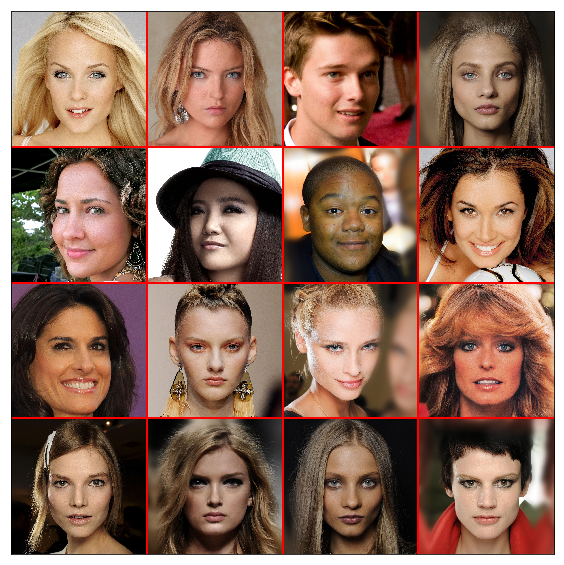

In [5]:
plt.figure(figsize=(10,10))
draw_images_color(imgs/255,4,4);

# Outliers
They are unfortunately a few outliers in the dataset.

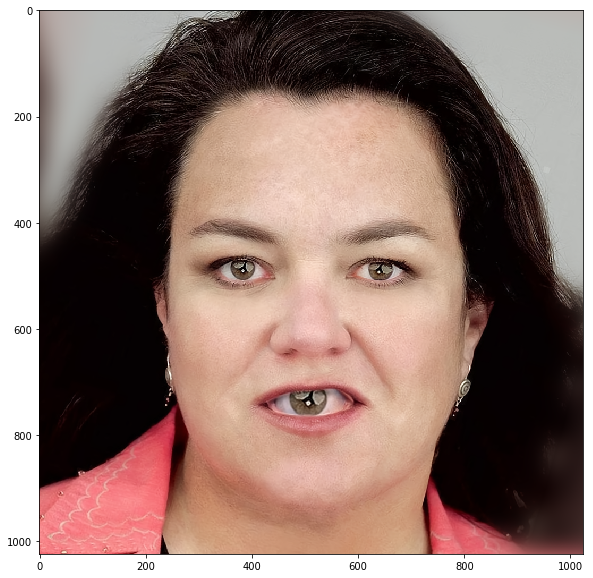

In [6]:
number = 2815
path = os.path.join(datadir, 'imgHQ{:05d}.npy'.format(number))
img = np.load(path)[0].transpose(1,2,0)
plt.figure(figsize=(10,10))
plt.imshow(img);

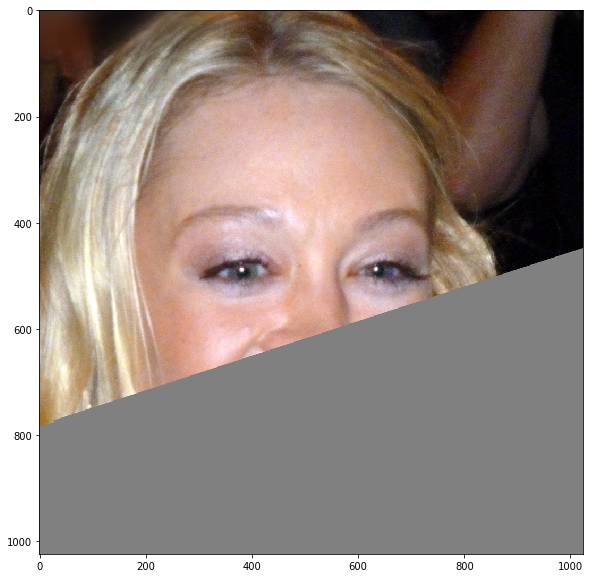

In [7]:
number = 70
path = os.path.join(datadir, 'imgHQ{:05d}.npy'.format(number))
img = np.load(path)[0].transpose(1,2,0)
plt.figure(figsize=(10,10))
plt.imshow(img);